### Import Modules

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Part 1: Reading the images

We can read the images simply by using the `cv2.imshow` function. There are 3 images:  
1. `background-LE.bmp` which is the lower limit of the sensor.
2. `fullscale-LE.bmp` which is the upper limit of the sensor.
3. `object-LE.bmp` which is the object we want to measure.

In [21]:
lower_limit_img = cv2.imread('background-LE.bmp', 0)
upper_limit_img = cv2.imread('fullscale-LE.bmp', 0)
img = cv2.imread('object-LE.bmp', 0)

Now we can plot the images:

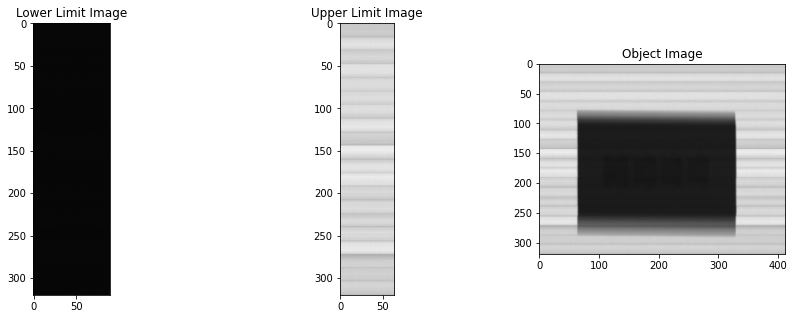

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(lower_limit_img, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title('Lower Limit Image')
ax[1].imshow(upper_limit_img, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title('Upper Limit Image')
ax[2].imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax[2].set_title('Object Image')
plt.show()

### Part 2: Taking the average of columns of lower and upper limit images

In this section, we need to take the average of columns of lower and upper limit images to calculate the lower and upper limit for each sensor.

In [23]:
lower_limit_avg = np.mean(lower_limit_img, axis=1, keepdims = True)
upper_limit_avg = np.mean(upper_limit_img, axis=1, keepdims = True)

### Part 3: Normalize the object image

So far, we have the lower and upper limit for each sensor. Now we need to normalize the object image.  

In order to normalize the object image, we need to subtract the lower limit from the object image and divide the result by the difference between the upper and lower limit.

In [24]:
normalized_image = (img - lower_limit_avg) / (upper_limit_avg - lower_limit_avg) * 255

### Part 4: Comparing the original and normalized images

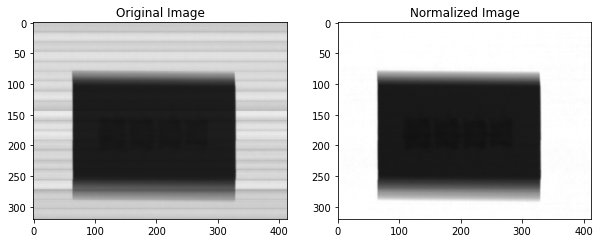

In [29]:
fix, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original Image')

ax[1].imshow(normalized_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Normalized Image')

plt.show();

As you can see, because of the normalization, the empty regions of the image are now white and the object is black.